<a href="https://colab.research.google.com/github/sibeliu/Auto-GPT/blob/master/Astir_PS_and_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Timeseries forecasting for emergency room load
PS forecasting with weather data
df PS and weather.csv


**Authors:** Jonah Lynch<br>
**Date created:** 2023/5/29<br>

## Setup
This example requires TensorFlow 2.3 or higher.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from google.colab import drive


drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).





## Emergency Room Data Time-Series


In [3]:
df = pd.read_csv("/content/drive/MyDrive/df PS and weather.csv")


In [4]:
df.index = df.iloc[:,0:1]
df = df.iloc[:,1:]


In [5]:
df.head()


,num_pazienti_in_attesa_totale_colori,num_pazienti24ore_totale_colori,num_pazienti24ore_bianchi,num_pazienti24ore_verdi,num_pazienti24ore_gialli,num_pazienti24ore_rossi,num_pazienti_giorno_totale_colori,num_pazienti_giorno_bianchi,num_pazienti_giorno_verdi,num_pazienti_giorno_gialli,...,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",rain
"(2022-02-11 00:00:00,)",6.40,111.80,0.0,72.8,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:15:00,)",4.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:30:00,)",2.80,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:45:00,)",2.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 01:00:00,)",2.75,111.75,0.0,72.0,34.75,5.0,1.75,0.0,0.0,1.75,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#interpolation has introduced some negative numbers in the num_pazienti_in_attesa_totale_colori: make them zeros
df[df['num_pazienti_in_attesa_totale_colori']<0] = 0
df.head()

,num_pazienti_in_attesa_totale_colori,num_pazienti24ore_totale_colori,num_pazienti24ore_bianchi,num_pazienti24ore_verdi,num_pazienti24ore_gialli,num_pazienti24ore_rossi,num_pazienti_giorno_totale_colori,num_pazienti_giorno_bianchi,num_pazienti_giorno_verdi,num_pazienti_giorno_gialli,...,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",rain
"(2022-02-11 00:00:00,)",6.40,111.80,0.0,72.8,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:15:00,)",4.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:30:00,)",2.80,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:45:00,)",2.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 01:00:00,)",2.75,111.75,0.0,72.0,34.75,5.0,1.75,0.0,0.0,1.75,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
features = df
features.head()

,num_pazienti_in_attesa_totale_colori,num_pazienti24ore_totale_colori,num_pazienti24ore_bianchi,num_pazienti24ore_verdi,num_pazienti24ore_gialli,num_pazienti24ore_rossi,num_pazienti_giorno_totale_colori,num_pazienti_giorno_bianchi,num_pazienti_giorno_verdi,num_pazienti_giorno_gialli,...,solarenergy,uvindex,severerisk,Clear,Overcast,Partially cloudy,Rain,"Rain, Overcast","Rain, Partially cloudy",rain
"(2022-02-11 00:00:00,)",6.40,111.80,0.0,72.8,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:15:00,)",4.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:30:00,)",2.80,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 00:45:00,)",2.00,111.00,0.0,72.0,34.00,5.0,1.00,0.0,0.0,1.00,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
"(2022-02-11 01:00:00,)",2.75,111.75,0.0,72.0,34.75,5.0,1.75,0.0,0.0,1.75,...,0.0,0.0,10.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#get response variable in separate vector
y = df['num_pazienti_in_attesa_totale_colori']
y.head()

(2022-02-11 00:00:00,)    6.40
(2022-02-11 00:15:00,)    4.00
(2022-02-11 00:30:00,)    2.80
(2022-02-11 00:45:00,)    2.00
(2022-02-11 01:00:00,)    2.75
Name: num_pazienti_in_attesa_totale_colori, dtype: float64

## Data Preprocessing

Observation is recorded every
3 mins, that means 20 times per hour. (We could resample one point per half hour if no
drastic change is expected within 30 minutes. We do this via the `sampling_rate`
argument in `timeseries_dataset_from_array` utility. In that case 'step' should be set at 10: 3*10 = 30 min.)

We are tracking data from past 720 timestamps (720/20=36 hours). This data will be
used to predict the PS load after 72 timestamps (72/20=3.6 hours).

Since every feature has values with
varying ranges, we do normalization to confine feature values to a range of `[0, 1]` before
training a neural network.
We do this by subtracting the mean and dividing by the standard deviation of each feature.

Categorical data (hour and day) will be excluded from normalization and instead encoded as one-hot vectors.

80 % of the data will be used to train the model. `split_fraction` can
be changed to alter this percentage.

The model is shown data for first 720 observations, that are sampled every
3 minutes. The load after 72 (3.6 hours * 20 observation per hour) observations will be
used as a label.

In [9]:
split_fraction = 0.715
train_split = int(split_fraction * int(df.shape[0]))
step = 1 #this is the sampling rate: 1 means use every data point. 
# It looks like the indicator changes on a 15 min scale, so in this case use step = 1

#parameters to play with
past = 7200
future = 96 #one day look-ahead
learning_rate = 0.01
batch_size = 512
epochs = 5

#z-score normalization (must not be applied to category variables)
def normalize(data, train_split):
    data_mean = data[:train_split].mean(axis=0)
    data_std = data[:train_split].std(axis=0)
    return (data - data_mean) / data_std

#max-min normalization (leaves category variables alone automatically)
def maxmin(data, train_split):
  data_min = data[:train_split].min(axis=0)
  data_max = data[:train_split].max(axis=0)
  return (data - data_min)/(data_max - data_min)

#no normalization 
def no_normal(data, train_split):
  return data
  

In [11]:

#using no normalization
# features = no_normal(features.values, train_split)
# features = pd.DataFrame(features)

#using maxmin normalization
#features = maxmin(features.values, train_split)
#features = pd.DataFrame(features)

#using z-score normalization
numerical_features = features.iloc[:,1:]
# categorical_features = features.iloc[:,51:]
# categorical_features = maxmin(categorical_features.values, train_split)
# categorical_features = pd.DataFrame(categorical_features)

numerical_features = normalize(numerical_features.values, train_split)
features = pd.DataFrame(numerical_features)
# features = pd.concat([numerical_features, categorical_features], axis=1)

#just for fun let's try with only time data
#features = categorical_features



features.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
0,-0.372559,-0.525888,1.550917,-0.293595,-1.242565,-0.239005,-1.209728,-1.151727,-1.020623,0.874695,...,-0.649476,-0.63581,0.114593,1.428538,-0.11224,-1.335877,-0.035329,-0.014294,-0.152315,-0.274749
1,-0.372559,-0.577530,1.550917,-0.293595,-1.242565,-0.239005,-1.209728,-1.151727,-1.020623,0.770366,...,-0.649476,-0.63581,0.114593,1.428538,-0.11224,-1.335877,-0.035329,-0.014294,-0.152315,-0.274749
2,-0.372559,-0.577530,1.550917,-0.293595,-1.242565,-0.239005,-1.209728,-1.151727,-1.020623,0.582574,...,-0.649476,-0.63581,0.114593,1.428538,-0.11224,-1.335877,-0.035329,-0.014294,-0.152315,-0.274749
3,-0.372559,-0.577530,1.550917,-0.293595,-1.242565,-0.239005,-1.209728,-1.151727,-1.020623,0.478246,...,-0.649476,-0.63581,0.114593,1.428538,-0.11224,-1.335877,-0.035329,-0.014294,-0.152315,-0.274749
4,-0.372559,-0.577530,1.664447,-0.293595,-1.223191,-0.239005,-1.209728,-1.072949,-1.020623,0.399999,...,-0.649476,-0.63581,0.114593,1.428538,-0.11224,-1.335877,-0.035329,-0.014294,-0.152315,-0.274749


Remember to normalize the response variable too, using the same method as above! 
Then we create two datasets, train_data and val_data, that contain normalized features. Keeping them separate so we can validate our model.

In [12]:
y = normalize(y.values, train_split)
#y = maxmin(y.values, train_split)
#y = no_normal(y.values, train_split)
y = pd.DataFrame(y)

train_data = features.loc[0 : train_split - 1]
val_data = features.loc[train_split:]

#y.iloc[1000:1020] #check to see if the assumption about step value was right. 
#Looks like sometimes the load changes more rapidly. Might need to go back and change step to smaller number

In [13]:
val_data.head()

,0,1,2,3,4,5,6,7,8,9,...,63,64,65,66,67,68,69,70,71,72
28483,1.581592,-1.558733,-0.114182,0.005293,0.142013,-0.239005,-0.063826,0.843981,-0.218315,-0.293786,...,-0.550144,-0.63581,0.114593,-0.743572,-0.11224,0.813798,-0.035329,-0.014294,-0.152315,-0.274749
28484,1.581592,-1.662017,-0.114182,-0.293595,0.152346,-0.239005,-0.049766,0.843981,-0.218315,-0.252055,...,-0.550144,-0.63581,0.114593,-0.743572,-0.11224,0.813798,-0.035329,-0.014294,-0.152315,-0.274749
28485,1.581592,-1.791123,-0.114182,0.080015,0.178178,-0.239005,-0.049766,0.843981,0.182839,-0.147726,...,-0.574977,-0.63581,0.114593,-0.743572,-0.11224,0.813798,-0.035329,-0.014294,-0.152315,-0.274749
28486,1.581592,-1.855675,-0.114182,0.229460,0.193677,-0.239005,-0.049766,0.843981,0.343301,-0.085129,...,-0.599810,-0.63581,0.114593,-0.743572,-0.11224,0.813798,-0.035329,-0.014294,-0.152315,-0.274749
28487,1.581592,-1.920228,-0.114182,0.453626,0.204009,-0.239005,-0.049766,0.843981,0.583993,-0.043398,...,-0.624643,-0.63581,0.114593,-0.743572,-0.11224,0.813798,-0.035329,-0.014294,-0.152315,-0.274749


# Training dataset

The training dataset labels starts from the 792nd observation (720 + 72).

In [14]:
#First we need to do some magic to establish the time lag that allows prediction
start = past + future
end = start + train_split

x_train = train_data.values #choose all predictors in dataset
y_train = y.iloc[start:end] #response data only between 'start' and 'end' 

sequence_length = int(past / step)

The `timeseries_dataset_from_array` function takes in a sequence of data-points gathered at
equal intervals, along with time series parameters such as length of the
sequences/windows, spacing between two sequence/windows, etc., to produce batches of
sub-timeseries inputs and targets sampled from the main timeseries.

In [15]:
dataset_train = keras.preprocessing.timeseries_dataset_from_array(
    x_train,
    y_train,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)

## Validation dataset

The validation dataset must not contain the last 792 rows as we won't have label data for
those records, hence 792 must be subtracted from the end of the data.

The validation label dataset must start from 792 after train_split, hence we must add
past + future (792) to label_start.

In [16]:
x_end = len(val_data) - past - future

label_start = train_split + past + future

x_val = val_data.iloc[:x_end].values
y_val = y.iloc[label_start:]

dataset_val = keras.preprocessing.timeseries_dataset_from_array(
    x_val,
    y_val,
    sequence_length=sequence_length,
    sampling_rate=step,
    batch_size=batch_size,
)


for batch in dataset_train.take(1):
    inputs, targets = batch

print("Input shape:", inputs.numpy().shape)
print("Target shape:", targets.numpy().shape)

Input shape: (512, 7200, 73)
Target shape: (512, 1)


## Training

In [17]:
inputs = keras.layers.Input(shape=(inputs.shape[1], inputs.shape[2]))
lstm_out = keras.layers.LSTM(2)(inputs)
outputs = keras.layers.Dense(1)(lstm_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss="mse")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 7200, 73)]        0         
                                                                 
 lstm (LSTM)                 (None, 2)                 608       
                                                                 
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 611
Trainable params: 611
Non-trainable params: 0
_________________________________________________________________


We'll use the `ModelCheckpoint` callback to regularly save checkpoints, and
the `EarlyStopping` callback to interrupt training when the validation loss
is not longer improving.

In [ ]:

path_checkpoint = "model_checkpoint.h5"
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=3)

modelckpt_callback = keras.callbacks.ModelCheckpoint(
    monitor="val_loss",
    filepath=path_checkpoint,
    verbose=1,
    save_weights_only=True,
    save_best_only=True,
)

history = model.fit(
    dataset_train,
    epochs=epochs,
    validation_data=dataset_val,
    callbacks = [es_callback, modelckpt_callback],
)

model.save("/content/drive/MyDrive/model.h5")

Epoch 1/5


We can visualize the loss with the function below. After some time, the loss stops
decreasing.

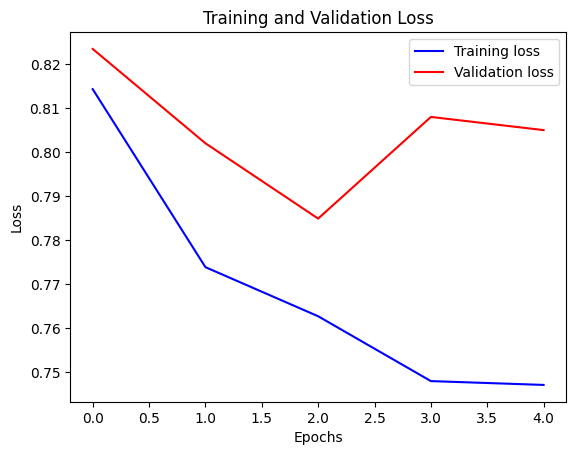

In [ ]:

def visualize_loss(history, title):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    epochs = range(len(loss))
    plt.figure()
    plt.plot(epochs, loss, "b", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")
    plt.title(title)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()


visualize_loss(history, "Training and Validation Loss")

## Prediction

The trained model above is now able to make predictions for 5 sets of values from
validation set.

16/16 [==============================] - 1s 41ms/step


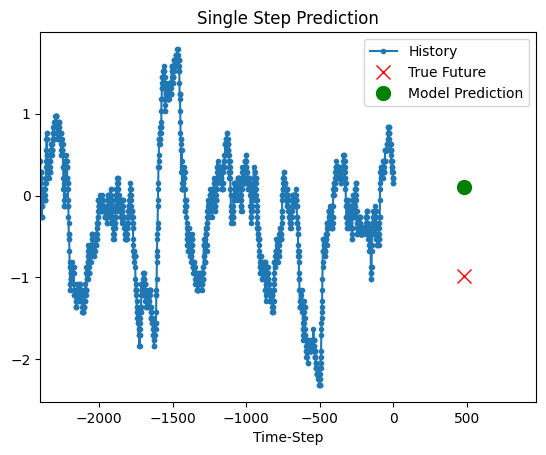

16/16 [==============================] - 1s 39ms/step


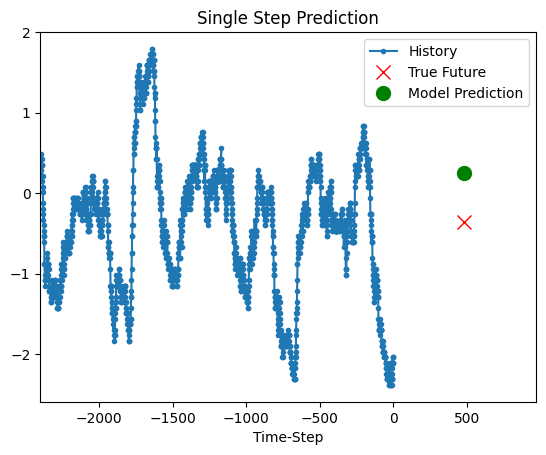

16/16 [==============================] - 1s 45ms/step


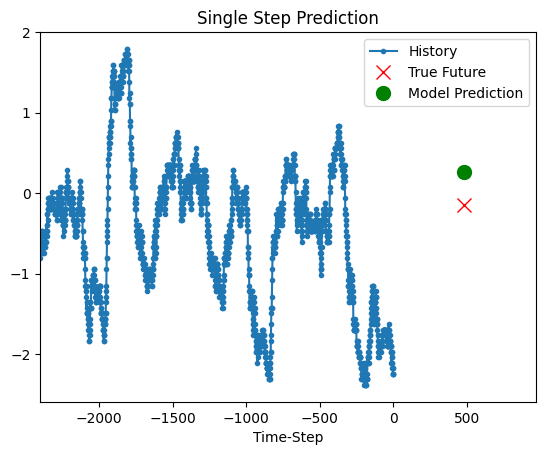

16/16 [==============================] - 1s 45ms/step


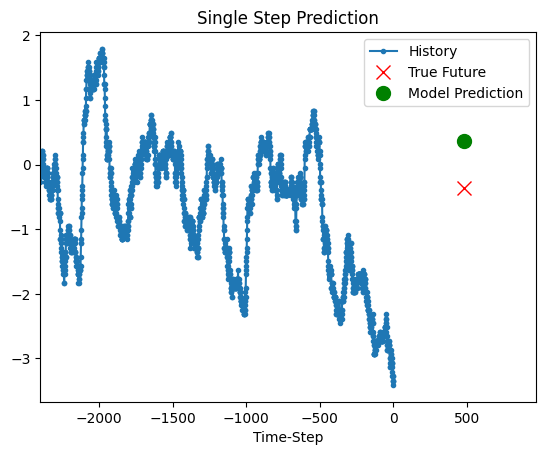

16/16 [==============================] - 1s 42ms/step


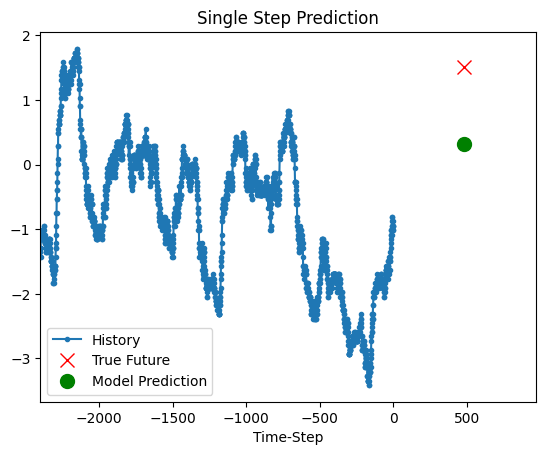

16/16 [==============================] - 1s 62ms/step


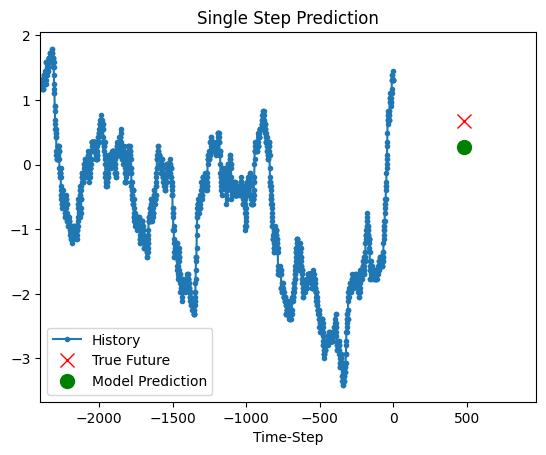

16/16 [==============================] - 1s 67ms/step


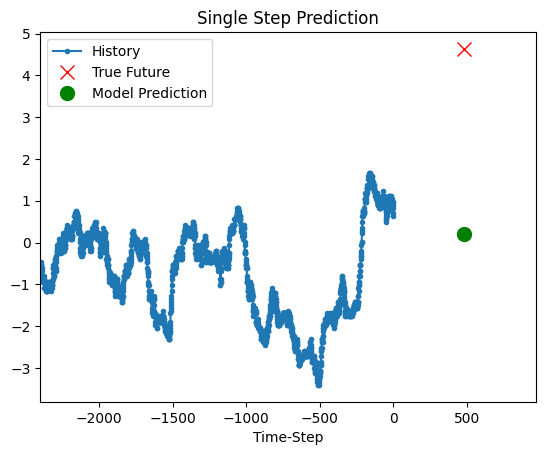

16/16 [==============================] - 1s 48ms/step


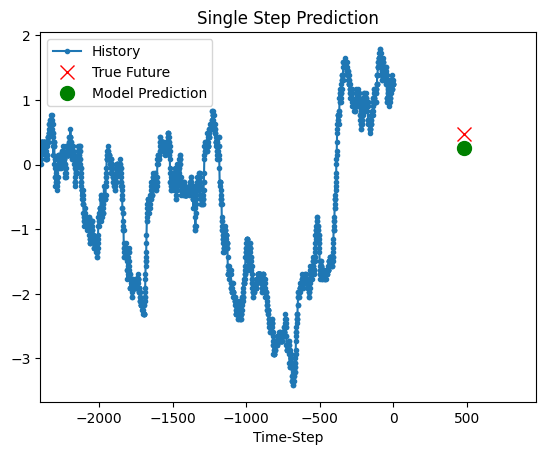

16/16 [==============================] - 1s 40ms/step


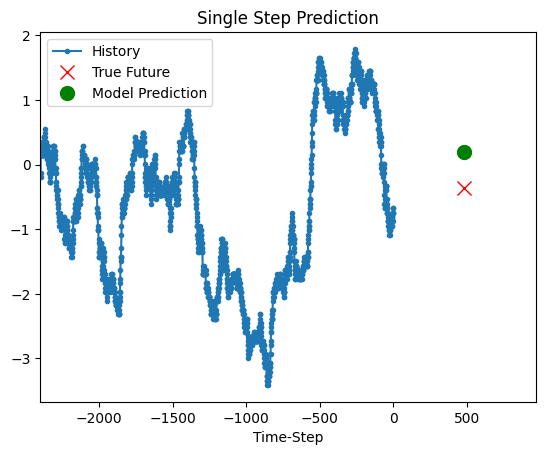

16/16 [==============================] - 1s 43ms/step


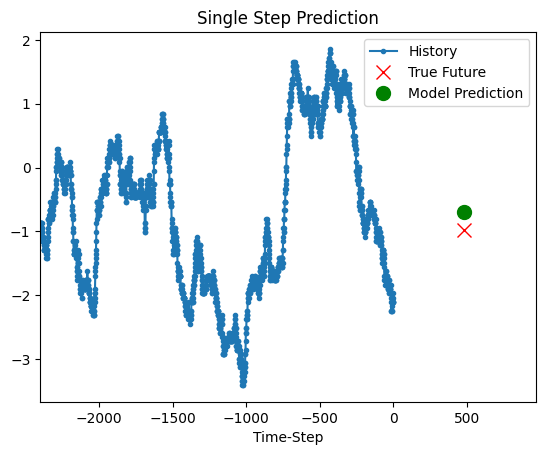

16/16 [==============================] - 1s 46ms/step


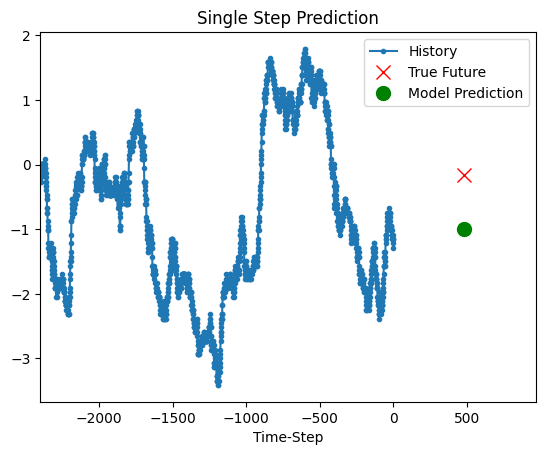

16/16 [==============================] - 1s 40ms/step


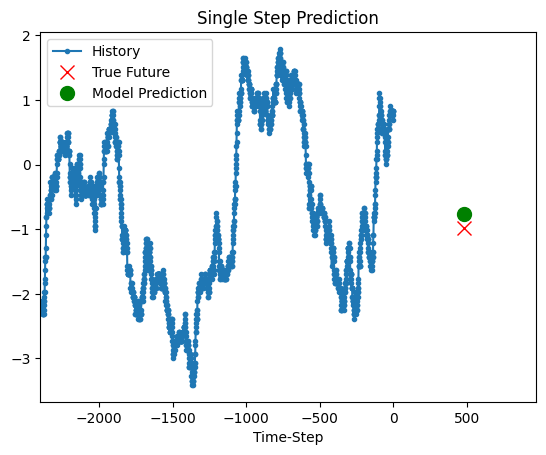

16/16 [==============================] - 1s 42ms/step


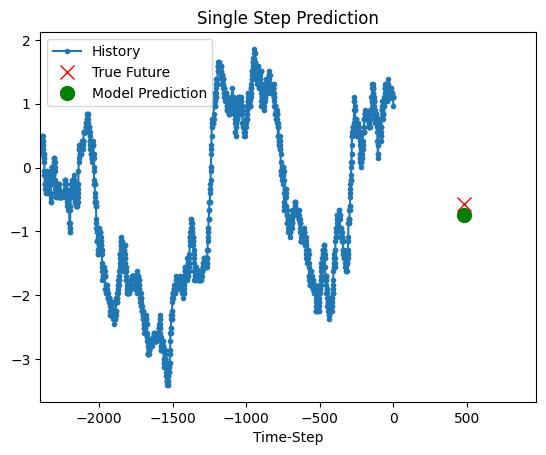

16/16 [==============================] - 1s 64ms/step


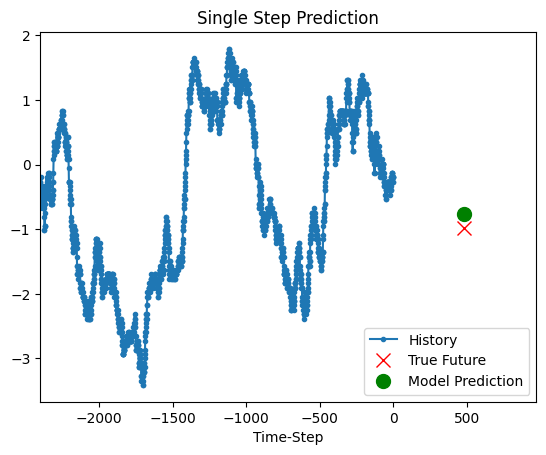

16/16 [==============================] - 1s 60ms/step


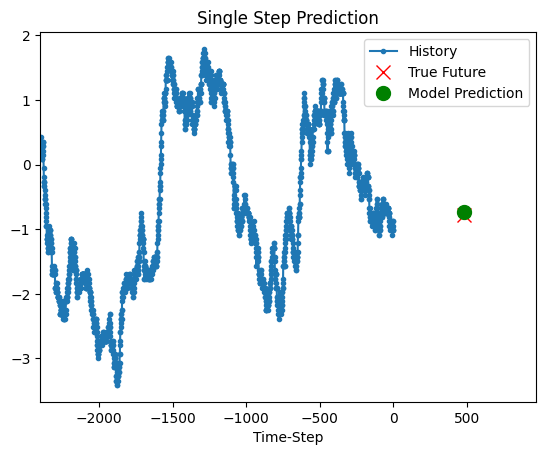

16/16 [==============================] - 1s 43ms/step


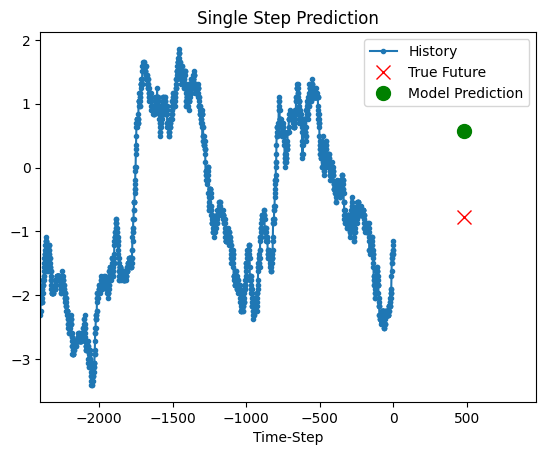

16/16 [==============================] - 1s 43ms/step


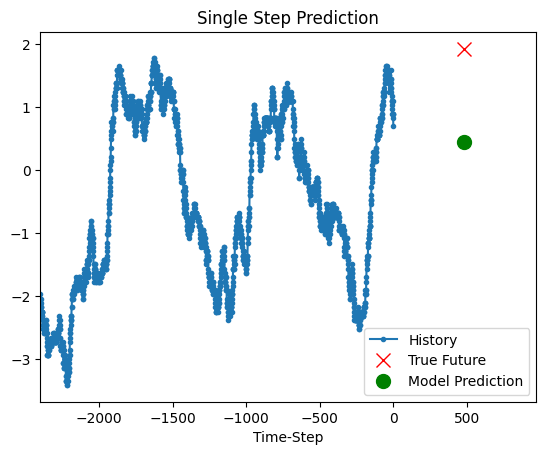

16/16 [==============================] - 1s 46ms/step


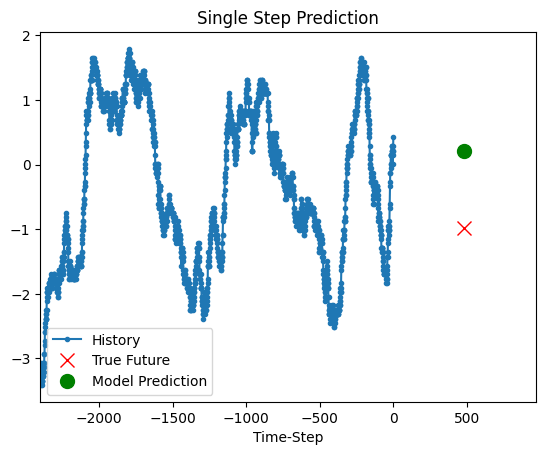

16/16 [==============================] - 1s 45ms/step


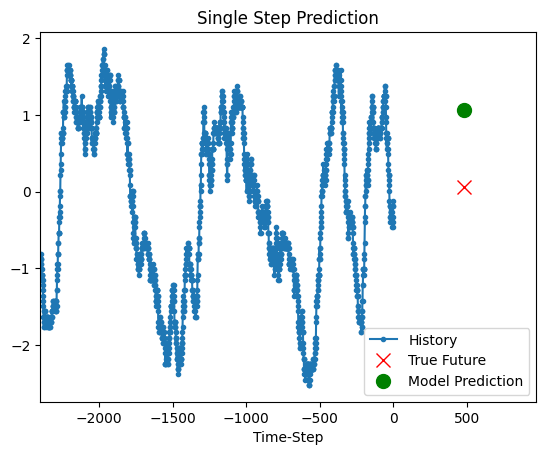

16/16 [==============================] - 1s 39ms/step


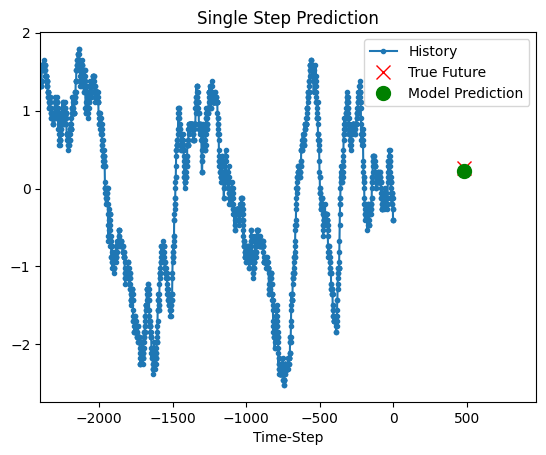

In [ ]:

def show_plot(plot_data, delta, title):
    labels = ["History", "True Future", "Model Prediction"]
    marker = [".-", "rx", "go"]
    time_steps = list(range(-(plot_data[0].shape[0]), 0))
    if delta:
        future = delta
    else:
        future = 0

    plt.title(title)
    for i, val in enumerate(plot_data):
        if i:
            plt.plot(future, plot_data[i], marker[i], markersize=10, label=labels[i])
        else:
            plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future + 5) * 2])
    plt.xlabel("Time-Step")
    plt.show()
    return


for x, y in dataset_val.take(20):
    show_plot(
        [x[0][:, 1].numpy(), y[0].numpy(), model.predict(x)[0]],
        480,
        "Single Step Prediction",
    )


In [ ]:
for x,y in dataset_val.take(1):
  plot_data = x[0][:, 1].numpy()
  for i,val in enumerate(plot_data):
    print(val)

0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.19155360465980273
0.19155360465980273
0.19155360465980273
0.19155360465980273
0.25858375263142974
0.25858375263142974
0.25858375263142974
0.25858375263142974
0.25858375263142974
0.25858375263142974
0.19155360465980273
0.19155360465980273
0.19155360465980273
0.19155360465980273
0.19155360465980273
0.19155360465980273
0.19155360465980273
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.12452345668817569
0.05749330871654866
0.05749330871654866
0.05749330871654866
0.05749330871654866
-0.00953683925507838
-0.00953683925507838
-0.00953683925507838
-0.07656698722670542
-0.07656698722670542
-0.07656698722670542
-0.07656698722670542
-0.07656698722670542
-0.07656698722670542
-0.07656698

In [ ]:
model.save("model.h5")

In [ ]:
df.keys()


Index(['data_ora_sistema', 'indicatore_sovraffollamento',
       'num_pazienti24ore_totale_colori', 'num_pazienti24ore_bianchi',
       'num_pazienti24ore_verdi', 'num_pazienti24ore_gialli',
       'num_pazienti24ore_rossi', 'num_pazienti_giorno_totale_colori',
       'num_pazienti_giorno_bianchi', 'num_pazienti_giorno_verdi',
       'num_pazienti_giorno_gialli', 'num_pazienti_giorno_rossi',
       'num_pazienti_in_carico_totale_colori',
       'num_pazienti_in_carico_bianchi', 'num_pazienti_in_carico_verdi',
       'num_pazienti_in_carico_gialli', 'num_pazienti_in_carico_rossi',
       'num_pazienti_in_attesa_totale_colori',
       'num_pazienti_in_attesa_bianchi', 'num_pazienti_in_attesa_verdi',
       'num_pazienti_in_attesa_gialli', 'num_pazienti_in_attesa_rossi',
       'num_pazienti_in_trattamento_totale_colori',
       'num_pazienti_in_trattamento_bianchi',
       'num_pazienti_in_trattamento_verdi',
       'num_pazienti_in_trattamento_gialli',
       'num_pazienti_in_trattament

**Example available on HuggingFace**
| Trained Model | Demo |
| :--: | :--: |
| [![Generic badge](https://img.shields.io/badge/%F0%9F%A4%97%20Model-Time%20Series-black.svg)](https://huggingface.co/keras-io/timeseries_forecasting_for_weather) | [![Generic badge](https://img.shields.io/badge/%F0%9F%A4%97%20Spaces-Time%20Series-black.svg)](https://huggingface.co/spaces/keras-io/timeseries_forecasting_for_weather) |